# Inaugural Project

Imports and set magics:

In [1]:
%load_ext autoreload
%autoreload 2

# Imports
import numpy as np
import scipy
from scipy import optimize

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [2]:
#define values for all the variables
m = 1
nu = 10
epsilon = 0.3
tau_0 = 0.4
tau_1 = 0.1
kappa = 0.4
w = 1

Define objection function 

In [3]:
def utility(c,l,nu,epsilon):
    u = np.log(c) - nu*(l**(1+1/epsilon))/(1+1/epsilon) 
    return u

Define budget constraint

In [4]:
def bc(m,w,tau_0,tau_1,kappa,l):
    x = m + w*l - (tau_0*w*l + tau_1*max(w*l-kappa,0))
    return x

We create a function to maximize the utility 

In [5]:
def consumer_choice(l,m,w,nu,epsilon,tau_0,tau_1,kappa):
    c = bc(m,w,tau_0,tau_1,kappa,l)
    return -utility(c,l,nu,epsilon)

In [6]:
def maximization(m,w,nu,epsilon,tau_0,tau_1,kappa):
    sol = optimize.minimize_scalar(consumer_choice,method='bounded',bounds=(0,1),args=(m,w,nu,epsilon,tau_0,tau_1,kappa))
    
    l_opt = sol.x
    c_opt = bc(m,w,tau_0,tau_1,kappa,l_opt)
    u_opt = utility(c_opt,l_opt,nu,epsilon)
    return l_opt,c_opt,u_opt

## Question 2

In [7]:
# set population N = 10000
N = 10000

# choose lower bound = 0.5, upper bound=1.5 and size=N
ws = np.linspace(0.5,1.5,N)
# create empty tuples for l and c
ls = np.empty(N)
cs = np.empty(N)

for i,w in enumerate(ws):
    sol_0 = maximization(m,w,nu,epsilon,tau_0,tau_1,kappa)
    ls[i] = sol_0[0]
    cs[i] = sol_0[1]

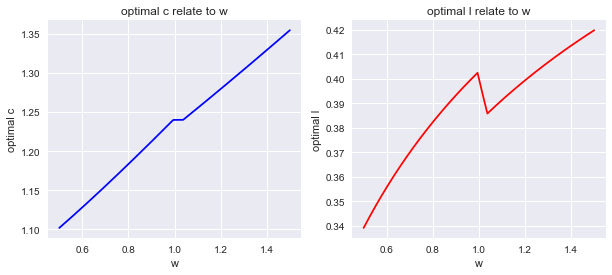

In [8]:
# plot the figure
fig = plt.figure(figsize=(10,4))
ax_left = fig.add_subplot(1,2,1)
ax_left.plot(ws,cs,color='Blue')

ax_left.set_title('optimal c relate to w')
ax_left.set_xlabel('w')
ax_left.set_ylabel('optimal c')
ax_left.grid(True)

ax_right = fig.add_subplot(1,2,2)
ax_right.plot(ws,ls,color='Red')

ax_right.set_title('optimal l relate to w')
ax_right.set_xlabel('w')
ax_right.set_ylabel('optimal l')
ax_right.grid(True)

## Question 3

In [9]:
# calculate the tax revenue T with uniformly distributed w from 0.5 to 1.5 
def tax_revenue(m=1,w=1,nu=10,epsilon=0.3,t_0=0.4,t_1=0.1,kappa=0.4):
    t = np.empty(N)
    for i in range(N): # calculate tax revenue for each i 
        t[i] = t_0*ws[i]*ls[i] + t_1*max(ws[i]*ls[i]-kappa,0) # adding all the taxes collected from each i 
        T = sum(t)
    return T

print("tax revenue" + " " + str(tax_revenue(i)))

tax revenue 1630.1868725628688


## Question 4

In [10]:
w_new = np.linspace(0.5,1.5,N)
# create empty tuples for l and c
l_new = np.empty(N)
c_new = np.empty(N)
for i,w in enumerate(ws):
    sol_1 = maximization(m=1,w=1,nu=10,epsilon=0.1,tau_0=0.4,tau_1=0.1,kappa=0.4)
    l_new[i] = sol_1[0]
    c_new[i] = sol_1[1]
    
# change e from 0.3 to 0.1
def tax_revenue_0(m=1,w=1,nu=10,epsilon=0.1,t_0=0.4,t_1=0.1,kappa=0.4):
    t_new = np.empty(N)
    for i in range(N):
        t_new[i] = t_0*w_new[i]*l_new[i] + t_1*max(w_new[i]*l_new[i]-kappa,0)
        T_0 = sum(t_new)
    return T_0
print ("tax revenue" + " " + str(tax_revenue_0(i)))

tax revenue 3184.6884325939127


# Question 5

In [13]:
# creating new tuples with 3 variables
x = np.zeros(3)
# define opt_tax_rev function which calculates the optimal tax revenue.
def opt_tax_rev(x,m=1,w=1,nu=10,epsilon=0.3):
    # define a vector x which includes tau_0,tau_1 and kappa
    tau0_new = x[0]
    tau1_new = x[1]
    kappa_new = x[2]
    
    return -tax_revenue(m,w,nu,epsilon,tau0_new,tau1_new,kappa_new)

In [18]:
# make initial guess for 3 variables
initial_guess=[0.4,0.4,0.2]
# set bounds for three variables
bounds_0 = ((0,1),(0,1),(0,1))
# solve maximization problem 
sol_2 = optimize.minimize(opt_tax_rev,initial_guess,method='L-BFGS-B',bounds=bounds_0,args=(m,w,nu,epsilon))

# obtain optimal values
t0_opt = sol_2.x[0]
t1_opt = sol_2.x[1]
kappa_opt = sol_2.x[2]

#print solution 
print ("optimal tau_0"+ " " + str(t0_opt))
print ("optimal tau_1"+ " " + str(t1_opt))
print ("optimal kappa" + " " + str(kappa_opt))

optimal tau_0 1.0
optimal tau_1 1.0
optimal kappa 0.0


# Conclusion

In question 1 and question 2 we have drawn the plot with changing values of c and l with respect to w. From the result of question 3 and question 4 we have found that by changing the value of epsilon from 0.3 to 0.1 the total tax revenues has increased from 1630 to 3184. In question 5 we have found that the optimal value for tau 0, tau1 and kappa are 1 and 1 and 2.07